## Investigating renting patterns of FordGoBike Users in Bay Area

## Presented By Trupti Patil

## Investigation Overview

### In this investigations I decided to find the renting habits and patterns of users of the bike renters. For this analysis of the users I focused on the factors like hour of the day, day of the week,duration of the trip and gender.


## Dataset Overview

### This data set includes information about 183412 individual rides made in February 2019 using bike-sharing system covering the greater San Francisco Bay area. 
#### This includes features like 
#### Trip Duration (seconds), 
#### Start Time and Date,  Stop Time and Date,
#### User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member),
#### Gender (Zero=unknown; 1=male; 2=female),
#### Start Station Name, End Station Name,Station ID,
#### Station Latitude/Longitude,
#### Bike ID, Year of Birth


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sb
import datetime
import calendar 

%matplotlib inline

In [2]:
df = pd.read_csv("fordgobiketripdata.csv")

#### Data tidying

In [3]:
df_clean = df.copy()

In [4]:
df_clean['member_birth_year'] = df_clean['member_birth_year'].fillna(0)
df_clean['member_gender'] = df_clean['member_gender'].fillna(0)
df_clean['end_station_id'] = df_clean['end_station_id'].fillna(0)
df_clean['end_station_name'] = df_clean['end_station_name'].fillna(0)
df_clean['start_station_id'] = df_clean['start_station_id'].fillna(0)
df_clean['start_station_name'] = df_clean['start_station_name'].fillna(0)
df_clean['member_birth_year'] = df_clean['member_birth_year'].astype(int)
df_clean['start_station_id'] = df_clean['start_station_id'].astype(int)
df_clean['send_station_id'] = df_clean['end_station_id'].astype(int)
df_clean['bike_share_for_all_trip'] = df_clean['bike_share_for_all_trip'].astype(bool)
df_clean['start_time'] = pd.to_datetime(df_clean.start_time)
df_clean['end_time'] = pd.to_datetime(df_clean.end_time)
df_clean['start_time_day'] = df_clean['start_time'].dt.strftime('%a')
df_clean['end_time_day'] = df_clean['end_time'].dt.strftime('%a')
df_clean['end_dow']= df_clean['end_time'].dt.dayofweek
df_clean['start_dow']= df_clean['start_time'].dt.dayofweek
df_clean['duration_min'] = df_clean['duration_sec']/60
df_clean['duration_min'] = df_clean['duration_min'].astype(int)
df_clean['start_Hour']= pd.DatetimeIndex(df_clean['start_time']).hour
df_clean['end_Hour']= pd.DatetimeIndex(df_clean['end_time']).hour
df_clean.loc[(df_clean.member_gender == '0'),'member_gender']='Other'

In [5]:
# drop id,bike_share_for_all_trip columns  as it bears no significance to the analysis

df_clean.drop(['bike_share_for_all_trip','bike_id','start_station_id','end_station_id','send_station_id'], axis=1,inplace=True)

In [6]:
df_clean.to_csv('fordgobiketripdata_v1.csv', index=False)

In [7]:
df_clean = pd.read_csv('fordgobiketripdata_v1.csv')

In [8]:
df_weekday = df_clean.loc[df_clean['start_time_day'].isin(['Mon','Tue','Wed','Thu','Fri'])]
df_weekend = df_clean.loc[df_clean['start_time_day'].isin(['Sat','Sun'])]
df_clean.loc[(df_clean.member_gender == '0'),'member_gender']='Other'

In [9]:
dfgr2=df_clean.groupby(["start_dow",'start_Hour', 'user_type'],as_index=False)['duration_min'].count()

### Explanatory Polishing

## Distribution of user types with gender

In [10]:
sb.set(style="darkgrid")
sb.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":13})
sb.set_palette("bright")

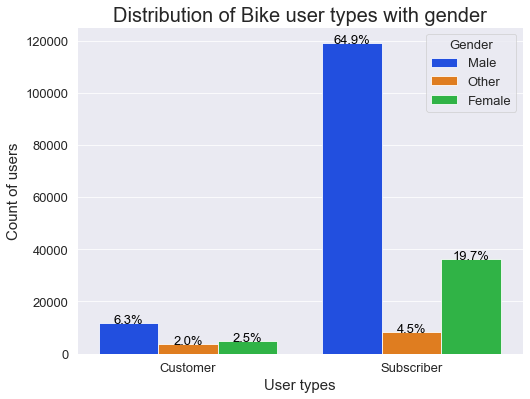

In [11]:
plt.figure(figsize=(8,6))
ax= sb.countplot(data = df_clean,x='user_type',hue='member_gender')
ax.set_title('Distribution of Bike user types with gender',fontsize=20)
ax.set_xlabel('User types',fontsize=15)
ax.set_ylabel('Count of users',fontsize=15)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.legend(title="Gender",fontsize=13,title_fontsize=13)
total = len(df_clean['user_type'])
for p in ax.patches:
        height = p.get_height()
        percentage = '{:.1f}%'.format(100 * height/total)
        ax.text(p.get_x()+p.get_width()/2.,
            height + 10,percentage,ha='center',color='black',fontsize=13)
        

plt.show()


### The male users are renting the bike most prominently than female users. 
### The subscribers are the major bike users than customers.
### There is some percentage of users of gender 'other'

### Number of weekday trips by daily hour by users

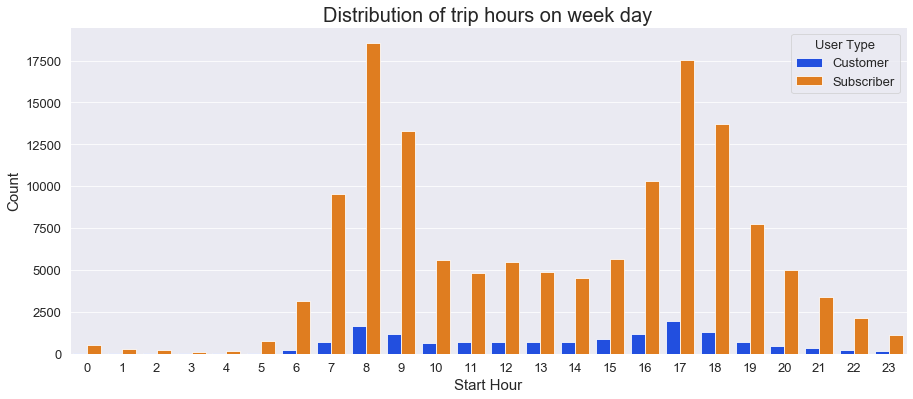

In [12]:
fig, ax = plt.subplots(figsize=(15, 6))
ax = sb.countplot(data=df_weekday, x='start_Hour',hue='user_type');
ax.set_title("Distribution of trip hours on week day",fontsize=20)
ax.set_xlabel("Start Hour",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.legend(title="User Type",fontsize=13,title_fontsize=13)
plt.show()

### More trips are taken on the weekday at 8 am and 5 pm

## Number of weekend trips by day hour by users

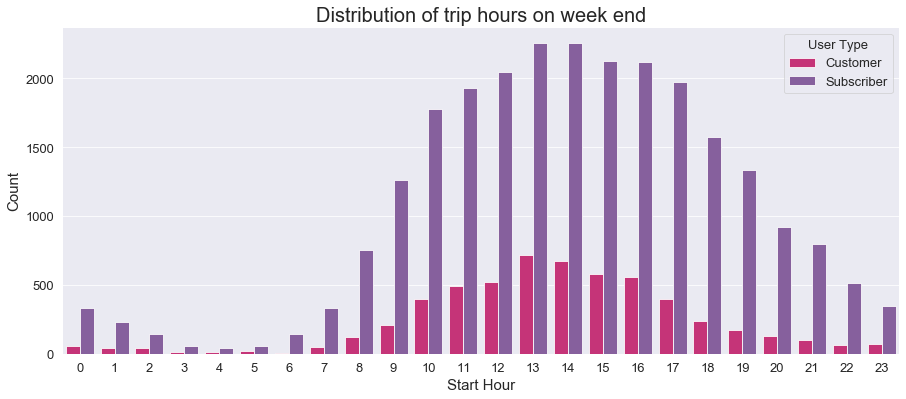

In [13]:
fig, ax = plt.subplots(figsize=(15, 6))

sb.countplot(data=df_weekend, x='start_Hour',hue='user_type',palette=['#dd1c77',"#8856a7"]);

ax.set_title("Distribution of trip hours on week end",fontsize=20)
ax.set_xlabel("Start Hour",fontsize=15)
ax.set_ylabel("Count",fontsize=15)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.legend(title="User Type",fontsize=13,title_fontsize=13)
plt.show()


### The peak of the week end trips are in the afternoon
### The weekend rental is less than weekday rental
### Though less but there is definite bike rental during midnight hours on the weekends

## Analysis of distribution of users by day of the week and day hour

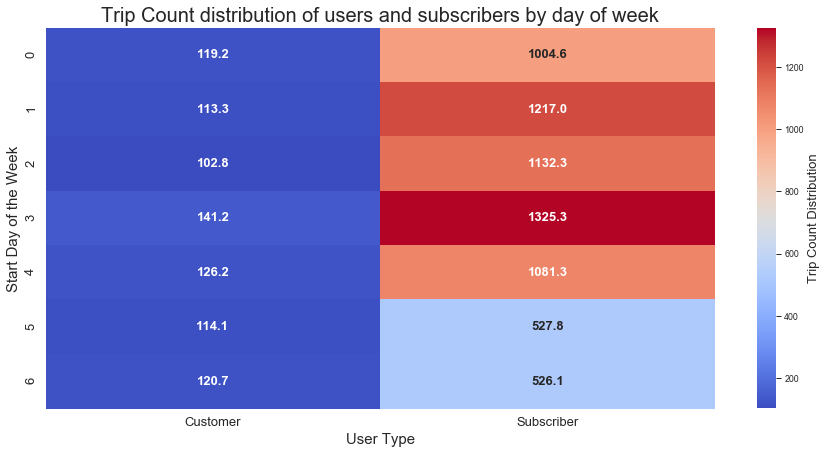

In [14]:
fig, ax = plt.subplots(figsize=(15, 7))

df_wide2=dfgr2.pivot_table( index='start_dow', columns='user_type', values='duration_min' )
sb.heatmap(df_wide2, annot=True, annot_kws={"style": "normal","size":13, "weight": "bold"},cmap='coolwarm',fmt='.1f',
           cbar_kws ={'label':'Trip Count Distribution'});


ax.set_title("Trip Count distribution of users and subscribers by day of week",fontsize=20)
ax.set_xlabel("User Type",fontsize=15)
ax.set_ylabel("Start Day of the Week",fontsize=15)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
plt.show()

### The Customer rental peaks on Sunday. The Subscriber ride more on weekdays with peak on Thursday .

## Analysis of the day of the week,duration and user type

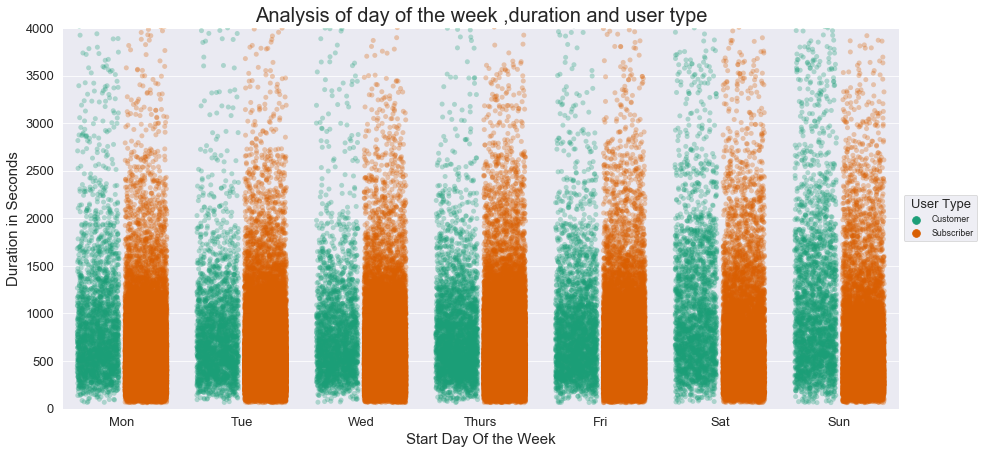

In [15]:
fig, ax = plt.subplots(figsize=(15,7))
sb.stripplot(data=df_clean,x='start_dow',y='duration_sec',hue='user_type',
             jitter=0.35,dodge=True,palette="Dark2",alpha=0.3)

plt.ylim(0,4000)
ax.set_title("Analysis of day of the week ,duration and user type",fontsize=20)
ax.set_xlabel("Start Day Of the Week",fontsize=15)
ax.set_ylabel("Duration in Seconds",fontsize=15)
ax.tick_params(axis='x', labelsize=13)
ax.tick_params(axis='y', labelsize=13)
ax.legend(loc='center left',bbox_to_anchor=(1,0.5),title="User Type",title_fontsize=13)
ax.set_xticklabels(['Mon','Tue','Wed','Thurs','Fri','Sat','Sun'])
                
plt.show()

### This graph shows more weekday use by the subscribers. 
### On Thursday the subscribers have peak usage.
### The customers use bike more on weekend than on weekday.

## Rent duration pattern by users on the day of the week

In [16]:
df_clean.loc[(df_clean.member_gender == '0'),'member_gender']='Other'
day_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
weekday_order = ['Mon','Tue','Wed','Thu','Fri']
weekend_order = ['Sat','Sun']


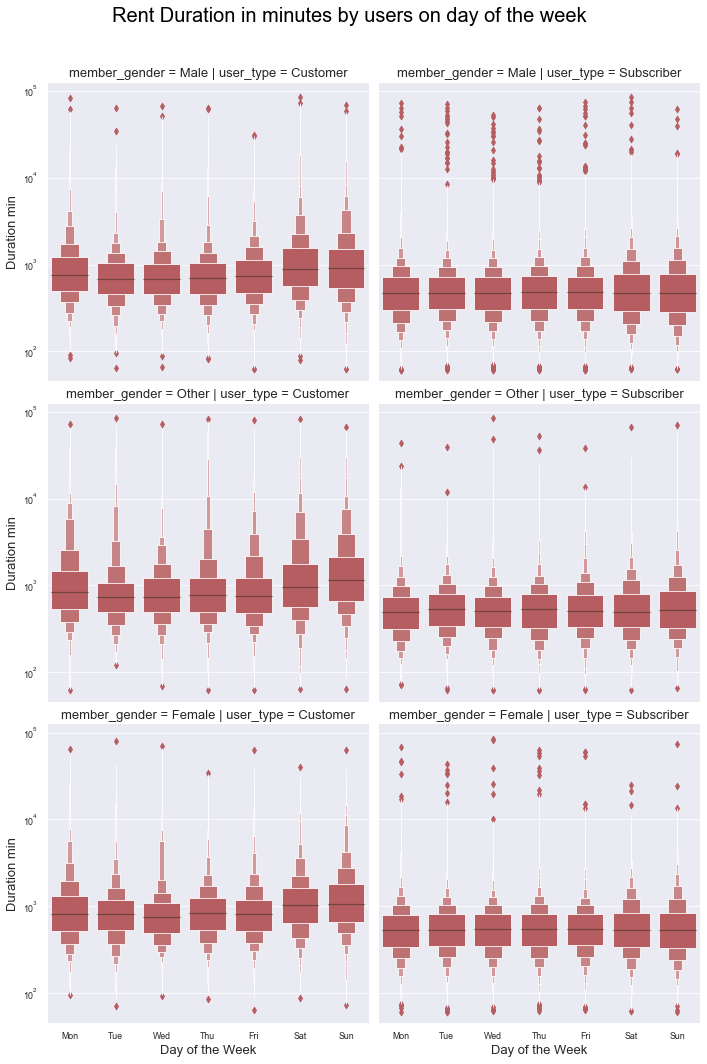

In [17]:
g = sb.catplot(data = df_clean, col = 'user_type', row = 'member_gender',x='start_time_day',y='duration_sec',
               height=5, kind="boxen",palette=["r"],order=day_order)
plt.yscale('log') 
g.set_axis_labels("Day of the Week", "Duration min")  
g.fig.subplots_adjust(top=0.91)
g.fig.suptitle('Rent Duration in minutes by users on day of the week',fontsize=20,color='Black');

### Number of  the male subscribers are greater than  the male customers.
### Number of the female subscribers and customers is almost same.
### The male renters are taking longer trips than female and other renters.

## Daily use pattern of the users by day of the week

In [18]:
df_clean.loc[(df_clean.member_gender == '0'),'member_gender']='Other'

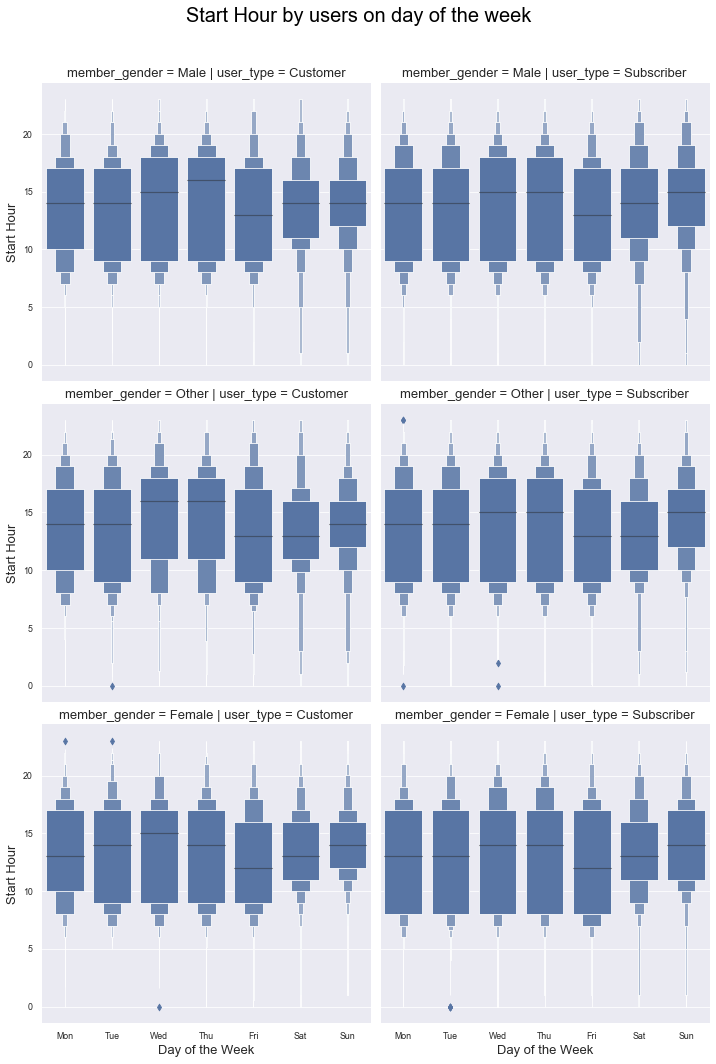

In [19]:
g = sb.catplot(data = df_clean, col = 'user_type', row = 'member_gender',x='start_time_day',y='start_Hour',
               height=5, kind="boxen",palette=["b"],order=day_order)
g.set_axis_labels("Day of the Week", "Start Hour")  
g.fig.subplots_adjust(top=0.91)
g.fig.suptitle('Start Hour by users on day of the week',fontsize=20,color='Black');

### This graph supports earlier observations about more weekday use than weekend use by subscribers.

### It brings out an interesting fact that the male customers and subscribers are taking the bike trips in wee hours also where as the females customers are not riding the bikes in weehours

In [21]:
!/Users/trupti/opt/anaconda3/bin/jupyter nbconvert CitiBike_Trupti_SlideShow.ipynb --to slides --post serve  --no-input --no-prompt 

[NbConvertApp] Converting notebook CitiBike_Trupti_SlideShow.ipynb to slides
[NbConvertApp] Writing 1098180 bytes to CitiBike_Trupti_SlideShow.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/CitiBike_Trupti_SlideShow.slides.html
Use Control-C to stop this server
^C

Interrupted
